In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Tensors, layers and autoencoders

## Accessing Keras layers

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(3,)))
model.add(Dense(1, activation='sigmoid'))
# model.compile()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Acessing the first layer of a Keras model
first_layer = model.layers[0]
# Printing the layer, and its input, output and weights
first_layer.input

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_input')>

In [4]:
first_layer.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [5]:
first_layer.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[-0.32764888, -0.57192147],
        [ 0.1689825 ,  0.2951162 ],
        [-0.30925095, -0.81393147]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

## What are tensors?

In [6]:
# Defining a rank 2 tensor (2 dimensions)
T2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Defining a rank 3 tensor (3 dimensions)
T3 = np.array(
    [
        [
            [1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]],
        
        [
            [10, 11, 12],
            [13, 14, 15],
            [16, 17, 18]],
        
        [
            [19, 20, 21],
            [22, 23, 24],
            [25, 26, 27]],
    ]
)

In [7]:
T2.shape, T3.shape

((3, 3), (3, 3, 3))

## Keras backend (Tensorflow)

If we import the Keras backend we can build a function that takes in an input tensor from a given layer and returns an output tensor from another or the same layer.

Tensorflow is the backend Keras is using in this course, but it could be any other, like Theano.

To define the function with our backend K we need to give it a list of inputs and outputs, even if we just want 1 input and 1 output.

Then we can use it on a tensor with the same shape as the input layer given during its definition.

If the weights of the layers between our input and outputs change the function output for the same input will change as well.

We can use this to see how the output of certain layers change as weights are adjusted during training, we will check this in the exercises! 

In [8]:
# Import Keras backend
import tensorflow.keras.backend as K
# Get the input and output tensors of a model layer
inp = model.layers[0].input
out = model.layers[0].output
# Function that maps layer inputs to outputs
inp_to_out = K.function([inp], [out])
inp_to_out

<function keras.backend.function.<locals>.func(model_inputs)>

In [9]:
# We pass and input and get the output we'd get in that first layer
X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
inp_to_out([X_train])

[array([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32)]

## Autoencoders

* Autoencoders are models that aim at producing the same inputs as outputs.

* This task alone wouldn't be very useful, but since along the way we decrease the number of neurons, we are effectively making our network learn to compress its inputs into a small set of neurons. 

## Autoencoder use cases
* Dimensionality reduction:
    * Smaller dimensional space representation of our inputs.
* De-noising data:
    * If trained with clean data, irrelevant noise will be filtered out during reconstruction.
* Anomaly detection:
    * A porr reconstruction will result when the model is fed with unseen inputs.
* ...

## Building a simple autoencoder

In [10]:
# Instantiate a sequential model
autoencoder = Sequential()
# Add a hidden layer of 4 neurons and an input layer of 100
autoencoder.add(Dense(4, input_shape=(100,), activation='relu'))
# Add an output layer of 100 neurons
autoencoder.add(Dense(100, activation='sigmoid'))
# Compile your model with the appropiate loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
 dense_3 (Dense)             (None, 100)               500       
                                                                 
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


## Breaking it into an encoder

In [11]:
# Building a separate model to encode inputs
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_test = np.array([range(0,100)])
X_test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [13]:
# Predicting returns the four hidden layer neuron outputs
encoder.predict(X_test)

1/1 [==============================] - 0s 36ms/step


array([[ 7.7384605,  0.       , 22.450825 , 91.31498  ]], dtype=float32)

## Exercises

### It's a flow of tensors

If you have already built a model, you can use the model.layers and the tensorflow.keras.backend to build functions that, provided with a valid input tensor, return the corresponding output tensor.

This is a useful tool when we want to obtain the output of a network at an intermediate layer.

For instance, if you get the input and output from the first layer of a network, you can build an inp_to_out function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

So that's what you're going to do right now!

X_test from the Banknote Authentication dataset and its model are preloaded. Type model.summary() in the console to check it. 

In [14]:
banknotes = pd.read_csv('banknotes.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(banknotes.iloc[:, 0:-1], banknotes.iloc[:,-1], test_size=0.3)
X_train, X_test, y_train, y_test = \
    X_train.values, X_test.values, y_train.values, y_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 4), (412, 4), (960,), (412,))

In [15]:
model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.optimizer.get_config()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [16]:
# Input tensor from the 1st layer of the model
inp = model.layers[0].input
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_4_input')>

In [17]:
# Output tensor from the 1st layer of the model
out = model.layers[0].output
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_4')>

In [18]:
# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])
# Print the results of passing X_test through the 1st layer
print(inp_to_out(X_test))

[array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.1096708 ,  0.05428107],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.3757741 ,  1.1000274 ],
       [ 0.        ,  0.        ],
       [ 3.7494466 ,  0.8449466 ],
       [ 0.5071011 ,  0.        ],
       [ 0.        ,  4.285106  ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.8789241 ],
       [ 2.2024531 ,  0.54275537],
       [ 2.1353226 ,  3.4637218 ],
       [ 0.93391037,  0.        ],
       [ 0.        ,  5.4661026 ],
       [ 0.        ,  0.        ],
       [ 0.        ,  3.7688603 ],
       [ 2.5492413 ,  6.007365  ],
       [ 0.        ,  8.3545    ],
       [ 0.        ,  5.897619  ],
       [ 0.        ,  3.4739256 ],
       [ 0.        ,  0.27955875],
       [ 0.        

### Neural separation

Put on your gloves because you're going to perform brain surgery!

Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset.

**You will make use of the inp_to_out() function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication model as it learns.**

The model you built in chapter 2 is ready for you to use, just like X_test and y_test. Paste show_code(plot) in the console if you want to check plot().

You're performing heavy duty, once all is done, click through the graphs to watch the separation live!

In [19]:
model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.optimizer.get_config()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [20]:
# Define a function from inputs to outputs
inp_to_out = K.function([model.layers[0].input], [model.layers[0].output])

In [21]:
X_train, X_test, y_train, y_test = \
    train_test_split(banknotes.iloc[:, 0:-1],
                     banknotes.iloc[:,-1],
                     test_size=0.2)
X_train, X_test, y_train, y_test = \
    X_train.values, X_test.values, y_train.values, y_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

In [22]:
def plot():
    fig, ax = plt.subplots(figsize=(3,3))
    plt.scatter(layer_output[:, 0], layer_output[:, 1], c=y_test, edgecolors='none', marker='.')
    plt.title('Epoch: {}, Test Accuracy: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
    plt.show()

9/9 [==============================] - 0s 839us/step - loss: 0.3323 - accuracy: 0.8582


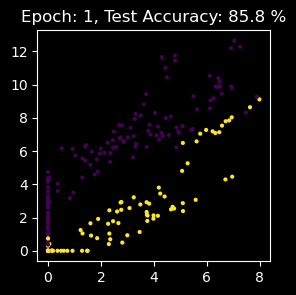

9/9 [==============================] - 0s 680us/step - loss: 0.1468 - accuracy: 0.9964


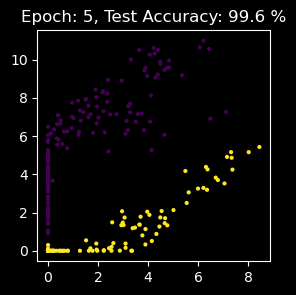

9/9 [==============================] - 0s 630us/step - loss: 0.1102 - accuracy: 0.9964


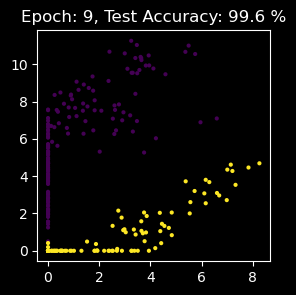

9/9 [==============================] - 0s 836us/step - loss: 0.0890 - accuracy: 1.0000


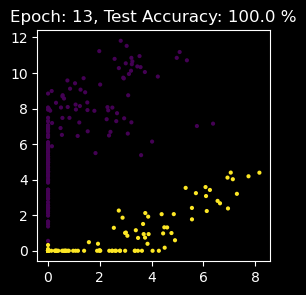

9/9 [==============================] - 0s 618us/step - loss: 0.0743 - accuracy: 1.0000


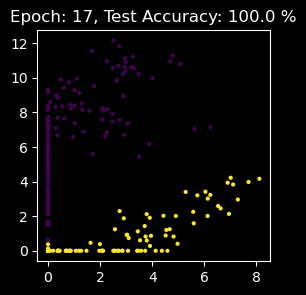

9/9 [==============================] - 0s 657us/step - loss: 0.0645 - accuracy: 0.9964


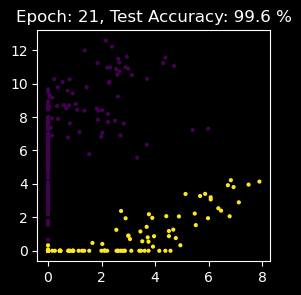

In [23]:
for i in range(0, 21):
    # Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
        # Get the output of the first layer
        layer_output = inp_to_out([X_test])[0]
        # Evaluate model accuracy for this epoch
        test_accuracy = model.evaluate(X_test, y_test)[1] 
        # Plot 1st vs 2nd neuron output
        plot()

If you take a look at the graphs you can see how the neurons are learning to spread out the inputs based on whether they are fake or legit dollar bills.

A single fake dollar bill is represented as a purple dot in the graph.

At the start the outputs are closer to each other, the weights are learned as epochs go by so that fake and legit dollar bills get a different, further and further apart output.

### Building an autoencoder

Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

The Sequential model and Dense layers are ready for you to use.

Let's build an autoencoder!

In [24]:
# Start with a sequential model
autoencoder = Sequential()
# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(28*28, ), activation="relu"))
# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(28*28, activation = "sigmoid"))
# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
# Summarize your model structure
autoencoder.summary()
autoencoder.optimizer.get_config()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


{'name': 'Adadelta',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.95,
 'epsilon': 1e-07}

### De-noising like an autoencoder

Okay, you have just built an autoencoder model. Let's see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with show_encodings(). To build the encoder you will make use of your autoencoder, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

Apply the power of the autoencoder!

In [25]:
# course suddenly change Adadelta.learning rate shown in previous task
autoencoder = Sequential()
autoencoder.add(Dense(32, input_shape=(28*28, ), activation="relu"))
autoencoder.add(Dense(28*28, activation = "sigmoid"))
autoencoder.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0),
                    loss = 'binary_crossentropy')
autoencoder.summary()
autoencoder.optimizer.get_config()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


{'name': 'Adadelta',
 'learning_rate': 1.0,
 'decay': 0.0,
 'rho': 0.95,
 'epsilon': 1e-07}

In [26]:
X_test = np.load('MNIST/X_test_MNIST.npy')
X_test_noise = np.load('MNIST/X_test_MNIST_noise.npy')
y_test  = np.load('MNIST/y_test_MNIST.npy')
X_test.shape, X_test_noise.shape, y_test.shape

((100, 784), (100, 784), (100,))

In [27]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

4/4 [==============================] - 0s 774us/step


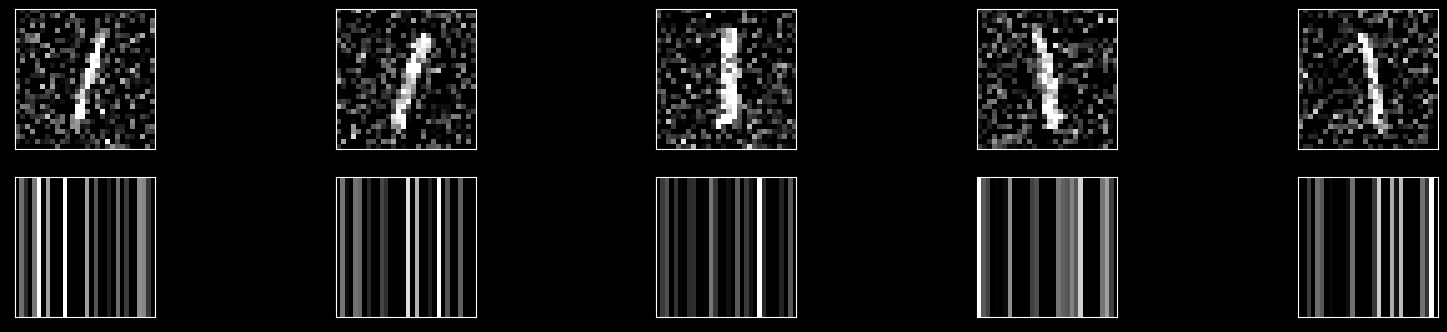

In [28]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])
# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

* Predict on X_test_noise with your autoencoder, this will effectively perform both the encoding and decoding.
* Plot noisy vs decoded images with compare_plot().

In [29]:
def compare_plot(original,decoded_imgs):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()

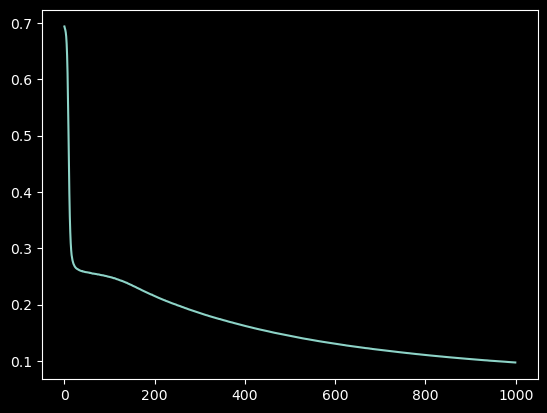

In [30]:
# training not mentioned in the course
h = autoencoder.fit(X_test_noise, X_test, epochs=1000, verbose=0)
_ = plt.plot(h.history['loss'])

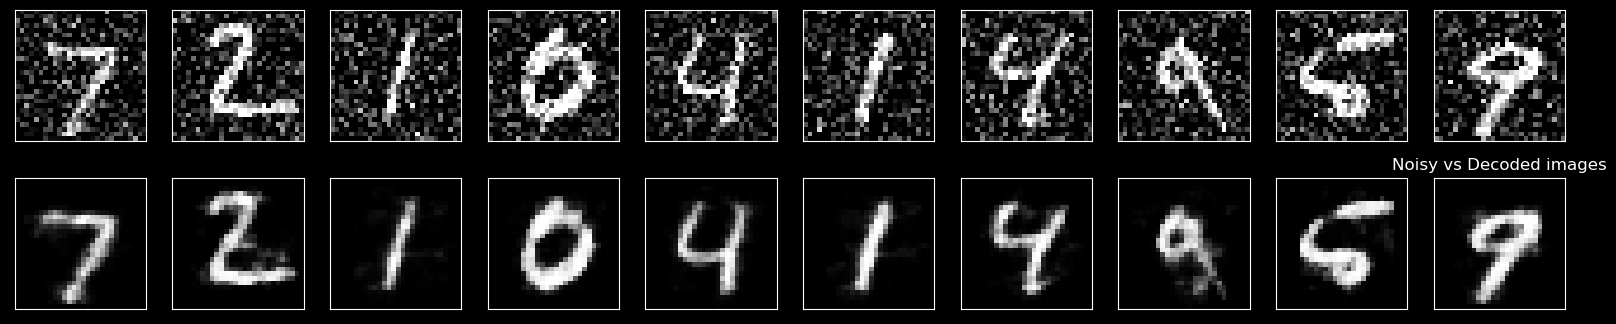

In [31]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise, verbose=0)
# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

The noise is gone now! You could get a better reconstruction by using a convolutional autoencoder. I hope this new model opened up your mind to the many possible architectures and non-classical ML problems that neural networks can solve

# Intro to CNNs

[From Wikipedia:](https://en.wikipedia.org/wiki/Convolutional_neural_network)
In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps.

They have applications in image and video recognition, recommender systems,[5] image classification, image segmentation, medical image analysis, natural language processing, brain–computer interfaces and financial time series.

## How do they work?

A convolutional model uses convolutional layers. A convolution is a simple mathematical operation that preserves spatial relationships. When applied to images it can detect relevant areas of interest like edges, corners, vertical lines, etc. 

## Convolutions demonstration

It consists of applying a filter, also known as kernel, of a given size.

In this image, we are applying a 3 by 3 kernel.

We center the kernel matrix of numbers as we slide through each pixel in the image, multiplying the kernel and pixel values at each location and averaging the sum of values obtained.

This effectively computes a new image where certain characteristics are amplified depending on the filter used.

The secret sauce of CNNs resides in letting the network itself find the best filter values and to combine them to achieve a given task. 

In [32]:
pixels = np.array(
    [
        [3, 3, 2, 1, 0],
        [0, 0, 1, 3, 1],
        [3, 1, 2, 2, 3],
        [2, 0, 0, 2, 2],
        [2, 0, 0, 0, 1],
    ]
)
pixels

array([[3, 3, 2, 1, 0],
       [0, 0, 1, 3, 1],
       [3, 1, 2, 2, 3],
       [2, 0, 0, 2, 2],
       [2, 0, 0, 0, 1]])

In [33]:
kernel = np.array(
    [
        [0, 1, 2],
        [2, 2, 0],
        [0, 1, 2]
    ]
)
kernel

array([[0, 1, 2],
       [2, 2, 0],
       [0, 1, 2]])

In [34]:
convolution = np.array(
    [
        [
            (pixels[i : i + kernel.shape[0], j : j + kernel.shape[1]] * kernel).sum()
            for j in range(pixels.shape[1] - kernel.shape[1] + 1)
        ]
        for i in range(pixels.shape[0] - kernel.shape[0] + 1)
    ]
)
convolution

array([[12, 12, 17],
       [10, 17, 19],
       [ 9,  6, 14]])

## Typical architectures

For a classification problem with many possible classes, CNNs tend to become very deep.

Architectures consist of concatenations of convolutional layers among other layers known as pooling layers, that we won't cover here.

Convolutional layers perform feature learning, we then flatten the outputs into a unidimensional vector and pass it to fully connected layers that carry out classification.

![Image](typical-cnn-architecture.png)

## Input shape to convolutional neural networks

Images are 3D tensors, they have width, height, and depth.

    input_shape = (WIDTH, HEIGHT, CHANNELS)

This depth is given by the color channels.

Color images have 3 channels

    input_shape = (28,28,3)

If we use black and white images we will just have one channel, so the depth will be 1.

    input_shape = (28,28,1)

## How to build a simple convolutional net in keras?

We instantiate our model and add a convolutional layer.

This first convolutional layer has 32 filters, this means it will learn 32 different convolutional masks.

These masks will be squares of 3 by 3 as defined in the kernel_size.

For 28 times 28 black and white images with only one channel, we use an input shape of (28, 28, 1). We can use any activation, as usual.

In [35]:
# Import Conv2D layer and Flatten from tensorflow keras layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten
# Instantiate your model as usual
model = Sequential()
# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


* We then add another convolutional layer and end flattening this 2D layer into a unidimensional layer with the Flatten layer.

In [36]:
# Add another convolutional layer
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         2312      
                                                                 
Total params: 2,632
Trainable params: 2,632
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Flatten the output of the previous layer
model.add(Flatten())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         2312      
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
Total params: 2,632
Trainable params: 2,632
Non-trainable params: 0
_________________________________________________________________


* We finish with an output dense layer. 

In [38]:
# End this multiclass model with 3 outputs and softmax
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         2312      
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 3)                 13827     
                                                                 
Total params: 16,459
Trainable params: 16,459
Non-trainable params: 0
_________________________________________________________________


## Deep convolutional models

ResNet50 is a 50 layer-deep model that performs well on the Imagenet Dataset, a huge dataset of more than 14 million images.

ResNet50 can distinguish between 1000 different classes.

This model would take too long to train on a regular computer, but Keras makes it easy for us to use it.

We just need to prepare the image we want to classify for the model, predict the processed image, and decode the predictions!

## Pre-processing images for ResNet50

* To use pre-trained models to classify images, we first have to adapt these images so that they can be understood by the model. 
* To prepare images for ResNet50 we would do the following.
    * First import the image from tensorflow.keras.preprocessing and preprocess_input from tensorflow.keras.applications.resnet50.
    * We then load our image with load_img, providing the target size, for this particular model that is 224 by 224.
    * We turn the image into a numpy array with img_to_array, we expand the dimensions of the array and preprocess the input in the same way the training images were.
    * To use pre-trained models to classify images, we first have to adapt these images so that they can be understood by the model.

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F591C29BA30>


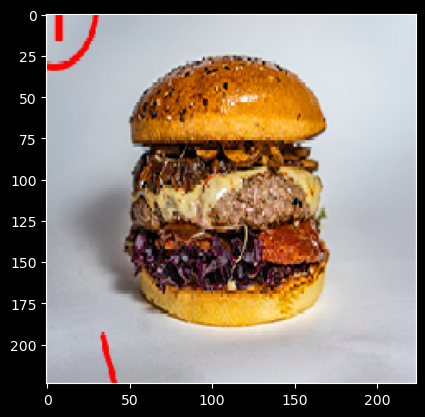

In [39]:
img_path = 'cheeseburger.png'
# Import image from keras preprocessing
from tensorflow.keras.preprocessing import image
# Import preprocess_input from tensorflow keras applications resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))
print(img)
_=plt.imshow(img)

In [40]:
# Turn it into an array
img = image.img_to_array(img)
img.shape

(224, 224, 3)

In [41]:
# Expand the dimensions so that it's understood by our network:
# img.shape turns from (224, 224, 3) into (1, 224, 224, 3)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [42]:
# Pre-process the img in the same way training images were
img = preprocess_input(img)

## Using the pre-trained ResNet50 model in Keras

In [43]:
# Import ResNet50 and decode_predictions from tensorflow.keras.applications.resnet50
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
# Instantiate a ResNet50 model with imagenet weights
model = ResNet50(weights='imagenet')
model.summary(line_length=122)

Model: "resnet50"
__________________________________________________________________________________________________________________________
 Layer (type)                           Output Shape               Param #       Connected to                             
 input_1 (InputLayer)                   [(None, 224, 224, 3)]      0             []                                       
                                                                                                                          
 conv1_pad (ZeroPadding2D)              (None, 230, 230, 3)        0             ['input_1[0][0]']                        
                                                                                                                          
 conv1_conv (Conv2D)                    (None, 112, 112, 64)       9472          ['conv1_pad[0][0]']                      
                                                                                                                         

In [44]:
# Predict with ResNet50 on our img array dimensions (1, 224, 224, 3)
preds = model.predict(img)
# Decode predictions and print it
decode_predictions(preds, top=1)[0]

1/1 [==============================] - 2s 2s/step


[('n07697313', 'cheeseburger', 0.98061347)]

## Exercises

### Building a CNN model

Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.

You're going to build a shallow convolutional model that classifies the MNIST digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and just have one channel, since they are black and white pictures.

Go ahead and build this small convolutional model!

In [45]:
# Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D, Flatten
model = Sequential()
# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation='relu'))
# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
# Flatten the previous layer output
model.add(Flatten())
# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()
model.optimizer.get_config()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                92170     
                                                                 
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

### Looking at convolutions

Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The outputs you will provide to this new model is the first convolutional layer outputs when given an MNIST digit as input image.

The convolutional model you built in the previous exercise has already been trained for you. It can now correctly classify MNIST handwritten images. You can check it with model.summary() in the console.

Let's look at the convolutional masks that were learned in the first convolutional layer of this model!

In [47]:
X_test = np.load('MNIST/X_test_MNIST.npy')
X_test_noise = np.load('MNIST/X_test_MNIST_noise.npy')
y_test  = np.load('MNIST/y_test_MNIST.npy')
X_test.shape, X_test_noise.shape, y_test.shape

((100, 784), (100, 784), (100,))

In [48]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test_noise = np.reshape(X_test_noise, (100, 28, 28, 1))
X_test = np.reshape(X_test, (100, 28, 28, 1))
X_test.shape, X_test_noise.shape, y_test.shape

((100, 28, 28, 1), (100, 28, 28, 1), (100, 10))

In [49]:
h = model.fit(X_test, y_test, verbose=0)

In [50]:
X_test.shape

(100, 28, 28, 1)

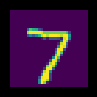

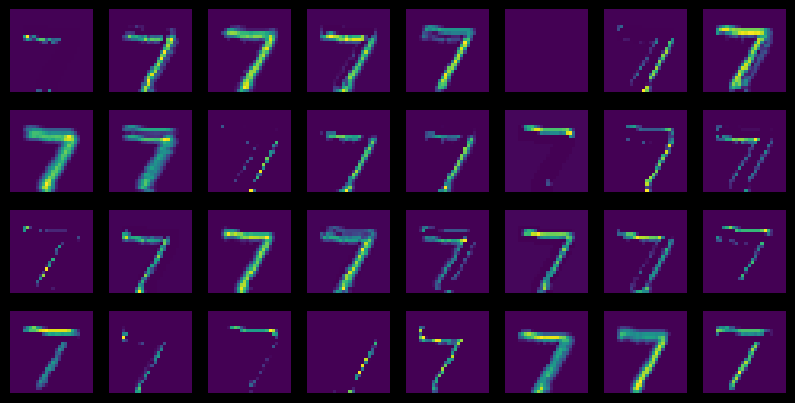

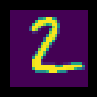

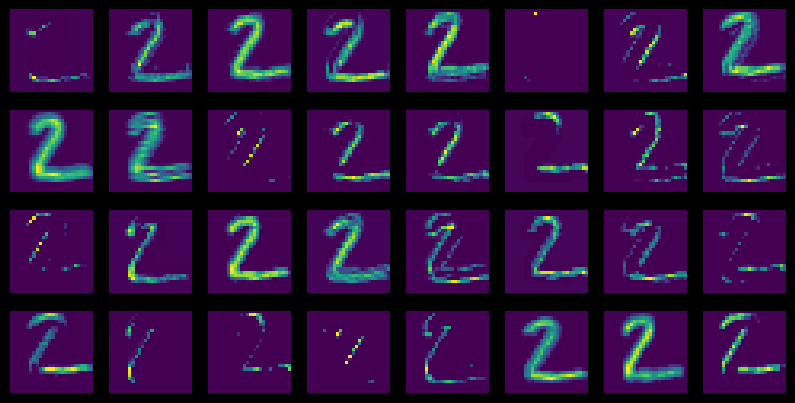

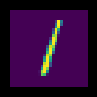

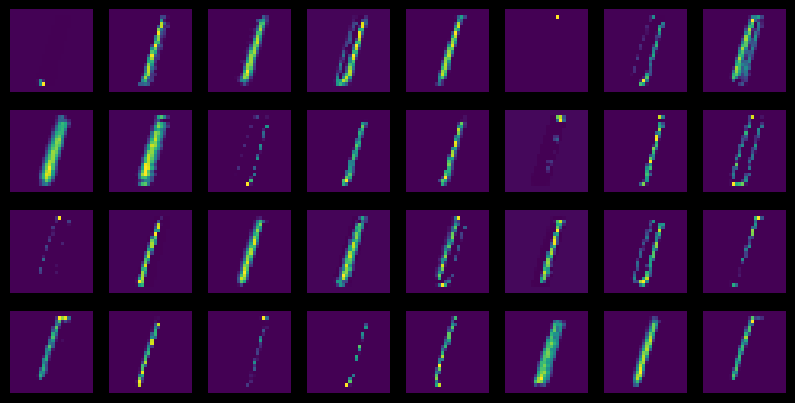

In [51]:
from tensorflow.keras.models import Model

# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output
# Build a model using the model's input and the first layer output
first_layer_model = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
# Use this model to predict on X_test
activations = first_layer_model.predict(X_test, verbose=0)

# plot first 3 X_test
for d in range(3):
    plt.figure(figsize=(1,1))
    plt.matshow(X_test[d,:,:,0], cmap = 'viridis', fignum=1)
    plt.axis('off')
    plt.show()
    fig, axs = plt.subplots(4,8, figsize=(10,5))
    k=0
    for i in range(4):
        for j in range(8):
            # Plot the activations of dth digit of X_test for 32 filters
            axs[i,j].matshow(activations[d,:,:,k], cmap = 'viridis')
            axs[i,j].axis('off')
            k+=1
    plt.show()

### Preparing your input image

The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels),np.expand_dims with parameter axis = 0 adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.

In [52]:
# Import image and preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img_path = 'dog.png'
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

In [53]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 346ms/step
Predicted: [('n02088364', 'beagle', 0.9072936), ('n02089867', 'Walker_hound', 0.066303246), ('n02089973', 'English_foxhound', 0.018889757)]


# Intro to LSTMs (Long short-term memory)

## What are RNNs?

[From Wikipedia:](https://en.wikipedia.org/wiki/Recurrent_neural_network) A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

LSTMs are a type of recurrent neural network, RNN for short. A simple RNN is a neural network that can use past predictions in order to infer new ones. This allows us to solve problems where there is a dependence on past inputs.

## What are LSTMs?

LSTM neurons are pretty complex, they are actually called units or cells. They have an internal state that is passed between units, you can see this as a memory of past steps. A unit receives the internal state, an output from the previous unit, and a new input at time t. Then it updates the state and produces a new output that is returned, as well as passed as an input to the following unit.

LSTM units perform several operations. They learn what to ignore, what to keep and to select the most important pieces of past information in order to predict the future. They tend to work better than simple RNNs for most problems. 

## When to use LSTMs?
* Image captioning
* Speech to text
* Text translation
* Document summarization
* Text generation
* Musical composition
* ...

## Sequence preparation

We first define some text and choose a sequence length. With a sequence length of 3 we will end up feeding our model with two words and it will predict the third one. We split the text into words with the split method. The output looks like this:

## Text preparation in Keras

After that we turn our text sequences into numbers. We import Keras Tokenizer from the preprocessing text module. Instantiate it, fit it on lines, and then turn those lines into numeric sequences. This is how the 3-word lines look now. The tokenizer object stores the word-to-number mapping. There are two dictionaries, the index_word, and the word_index. Here, the index_word is printed, which shows the encoded word for each index. We can use this dictionary to decode our outputs, mapping numbers back to words. 

We then, need to turn these words into consecutive lines of 3 words each. We can loop from seq_len to the number of words + 1 and store each line. The end results look like this: 

In [54]:
text = 'Hi this is a small sentence'
# We choose a sequence length
seq_len = 3
# Split text into a list of words
words = text.split()
words

['Hi', 'this', 'is', 'a', 'small', 'sentence']

## Embeddings

Neural networks can only deal with numbers, not text. We need to transform each unique word into a number. Then these numbers can be used as inputs to an embedding layer.

Embedding layers learn to represent words as vectors of a predetermined size. These vectors encode meaning and are used by subsequent layers.

In [55]:
# Make lines
lines = []
for i in range(seq_len, len(words) + 1):
    line = ' '.join(words[i-seq_len:i])
    lines.append(line)
lines

['Hi this is', 'this is a', 'is a small', 'a small sentence']

The tokenizer object stores the word-to-number mapping.

In [56]:
# Import Tokenizer from keras preprocessing text
from tensorflow.keras.preprocessing.text import Tokenizer
# Instantiate Tokenizer
tokenizer = Tokenizer()
# Fit it on the previous lines
tokenizer.fit_on_texts(lines)
# Turn the lines into numeric sequences
sequences = tokenizer.texts_to_sequences(lines)
sequences

[[5, 3, 1], [3, 1, 2], [1, 2, 4], [2, 4, 6]]

In [57]:
print(tokenizer.word_index)

{'is': 1, 'a': 2, 'this': 3, 'small': 4, 'hi': 5, 'sentence': 6}


## Building a LSTM model

In [58]:
# Import Dense, LSTM and Embedding layers
from tensorflow.keras.layers import Dense, LSTM, Embedding
model = Sequential()

The vocab_size is the length of the tokenizer dictionary plus one.

The plus one is because we account for 0 as an integer reserved for special characters, as we saw, our dictionary starts at 1, not 0. 

In [59]:
# Vocabulary size
vocab_size = len(tokenizer.index_word) + 1
vocab_size

7

We add an embedding layer, the input_dim is the vocab_size variable.

We will turn our word numbers into 8-dimensional vectors.

And need to declare the input_length so that our model understand that two words will be passed simultaneously as a sequence.

In [60]:
# Starting with an embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=2))
# Adding an LSTM layer

We end by adding an LSTM layer of 8 units, a hidden layer, and an output layer with softmax and as many outputs as possible words. 

In [61]:
model.add(LSTM(8))
# Adding a Dense hidden layer
model.add(Dense(8, activation='relu'))
# Adding an output layer with softmax
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 8)              56        
                                                                 
 lstm (LSTM)                 (None, 8)                 544       
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 7)                 63        
                                                                 
Total params: 735
Trainable params: 735
Non-trainable params: 0
_________________________________________________________________


## Exercises

### Text prediction with LSTMs

During the following exercises you will build a toy LSTM model that is able to predict the next word using a small text dataset. This dataset consist of cleaned quotes from the The Lord of the Ring movies. You can find them in the text variable.

You will turn this text into sequences of length 4 and make use of the Keras Tokenizer to prepare the features and labels for your model!

In [126]:
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'
print(text)

it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart


In [127]:
# Split text into an array of words 
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words)+1):
    sentences.append(' '.join(words[i - 4: i]))

In [128]:
# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
# print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5],sequences[:5]))

### Build your LSTM model

You've already prepared your sequences of text. It's time to build your LSTM model!

Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an Embedding layer that will essentially learn to turn words into meaningful vectors. These vectors will then be passed to a simple LSTM layer. Our output is a Dense layer with as many neurons as words in the vocabulary and softmax activation. This is because we want to obtain the highest probable next word out of all possible words.

The size of the vocabulary of words (the unique number of words) is stored in vocab_size.

In [129]:
vocab_size = len(tokenizer.index_word) + 1
vocab_size

45

In [130]:
# Import the Embedding, LSTM and Dense layer
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = vocab_size, input_length = 3, output_dim = 8))
# Add a 32 unit LSTM layer
model.add(LSTM(32))
# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 3, 8)              360       
                                                                 
 lstm_5 (LSTM)               (None, 32)                5248      
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 45)                1485      
                                                                 
Total params: 8,149
Trainable params: 8,149
Non-trainable params: 0
_________________________________________________________________


You'll see that this model is powerful enough to learn text relationships, we aren't using a lot of text in this tiny example and our sequences are quite short.

This model is to be trained as usual, you would just need to compile it with an optimizer like adam and use crossentropy loss.

This is because we have modeled this next word prediction task as a classification problem with all the unique words in our vocabulary as candidate classes.

In [131]:
# increased learning_rate because iterations are taking longer than the EarlyStopping
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

### Train (not shown in the course)

The course didn't reveal the training parameters and the training set.

In [132]:
X_train = np.array(sequences)[:,0:3]
y_train = to_categorical(np.array(sequences)[:,-1])
X_train.shape, y_train.shape

((63, 3), (63, 45))

#### Train parameters inference

The `epochs` parameter to train this model was estimated this way:

* The number of `model.optimizer.iterations` higher than 405 found in the live model object
* A `batch_size`
* The length of the training features `X_train`

$ epochs = iterations \div (train\_size \div batch size)$

    epochs = np.ceil(model.optimizer.iterations.numpy() / np.ceil(len(X_train) / batch_size))

In [133]:
iterations = 1000
batch_size = len(X_train)  # because default 32 seems low for such small train set
epochs = np.ceil(iterations / np.ceil(len(X_train) / batch_size)).astype('int')
epochs

1000

In [134]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
patience = 3
callbacks = [EarlyStopping(monitor='loss',
                           patience=patience),
             ModelCheckpoint('best_lstm_model.hdf5',
                             monitor='loss',
                             save_best_only = True)]
# batch_size = len(X_train)
h = model.fit(X_train, y_train,
              epochs=epochs, # default 1
              batch_size=batch_size, # default 32
              callbacks = callbacks,
              verbose=0)

In [135]:
epsilon_power = np.log10(model.optimizer.get_config()['epsilon']).astype('int')
print(f"history length: {len(h.history['loss'])}")
print(f'last {patience+1} history:')
print(f"loss     : {h.history['loss'][-patience-1:]}")
print(f"truncated: {[np.round(h, -epsilon_power) for h in h.history['loss'][-patience-1:]]}")
print(f"accuracy : {h.history['accuracy'][-patience-1:]}")

history length: 254
last 4 history:
loss     : [0.022684330120682716, 0.02268524467945099, 0.022691799327731133, 0.022707456722855568]
truncated: [0.0226843, 0.0226852, 0.0226918, 0.0227075]
accuracy : [0.9841269850730896, 0.9841269850730896, 0.9841269850730896, 0.9841269850730896]


Checking the number of iterations until the model is possibly checkpointed

In [136]:
model = tf.keras.models.load_model('best_lstm_model.hdf5')
model.optimizer.iterations.numpy()

251

#### simple prediction tests

A test sample is produced by trasnforming each word in texts to a sequence of integers. Only top `num_words-1` most frequent words will be taken into account.

In [137]:
test = np.array(tokenizer.texts_to_sequences(["it is not"]))
tokenizer.index_word[model.predict(test, verbose=0).argmax(axis = 1)[0]]

'the'

Only words known by the tokenizer will be taken into account.

In [138]:
test = np.array(tokenizer.texts_to_sequences(["it was not"]))
tokenizer.sequences_to_texts(test)

['it not']

In [139]:
tokenizer.index_word[model.predict(test, verbose=0).argmax(axis = 1)[0]]

'the'

### Decode your predictions

Your LSTM model has already been trained (details in the previous exercise success message) so that you don't have to wait. It's time to define a function that decodes its predictions. The trained model will be passed as a default parameter to this function.

Since you are predicting on a model that uses the softmax function, numpy's argmax() can be used to obtain the index/position representing the most probable next word out of the output vector of probabilities.

The tokenizer you previously created and fitted, is loaded for you. You will be making use of its internal index_word dictionary to turn the model's next word prediction (which is an integer) into the actual written word it represents. 

In [140]:
def predict_text(test_text, model = model):
    if len(test_text.split()) != 3:
        print('Text input should be 3 words!')
        return False
    # Turn the test_text into a sequence of numbers
    test_seq = tokenizer.texts_to_sequences([test_text])
    test_seq = np.array(test_seq)
    # Use the model passed as a parameter to predict the next word
    pred = model.predict(test_seq, verbose=0).argmax(axis = 1)[0]
    # Return the word that maps to the prediction
    return tokenizer.index_word[pred]

### Test your model!

The function you just built, predict_text(), is ready to use. Remember that the model object is already passed by default as the second parameter so you just need to provide the function with your 3 word sentences.

Try out these strings on your LSTM model:

    'meet revenge with'
    'the course of'
    'strength of the'

Which sentence could be made with the word output from the sentences above?

* [ ] A worthless gnome is king
* [X] Revenge is your history and spirit
* [ ] Take a sword and ride to Florida

Here we see that "strength of the" sentence can be followed either by 'body' or 'spirit' because both words have same probablity in the text.optimizeroptimizeroptimizer

In [141]:
strings = ['meet revenge with',
           'the course of',
           'strength of the']
[predict_text(text) for text in strings]

['revenge', 'history', 'body']

# What you've learned
* The basics of neural networks
* Building sequential models
* Building models for regression
* Approaching binary classification, multi-class and multi-label problems with neural networks
* Activation functions
* Hyperparameter tuning
* Autoencoders
* De-noising images
* CNN concepts
* Use pre-trained models
* Visualize convolutions
* LSTMs concepts
* Work with embedding layers and text
* All of this by using many different datasets and learning plenty of Keras's utility functions. 

# What could you learn next?
* Go deeper into CNNs
* Go deeper into LSTMs
* Keras Functional API
* Models that share layers, models with several branches
* GANs: Generative Adversarial Networks
* Deeplearning projects